In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

%matplotlib inline

In [2]:
data=pd.read_csv('movies.csv')

In [3]:
data.head()
#content_rating  限制等级
# genre分类


,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


In [5]:
data.describe()

,star_rating,duration
count,979.000000,979.000000
mean,7.889785,120.979571
std,0.336069,26.218010
min,7.400000,64.000000
25%,7.600000,102.000000
50%,7.800000,117.000000
75%,8.100000,134.000000
max,9.300000,242.000000


In [12]:
data.loc[data['content_rating'].isnull()]
#loc中的数据类型是series不能是别的

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [10]:
data.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

In [14]:
data.duplicated().sum()

0

In [18]:
gener_data=data.groupby(by='genre').count()['star_rating'].sort_values()
#默认生序

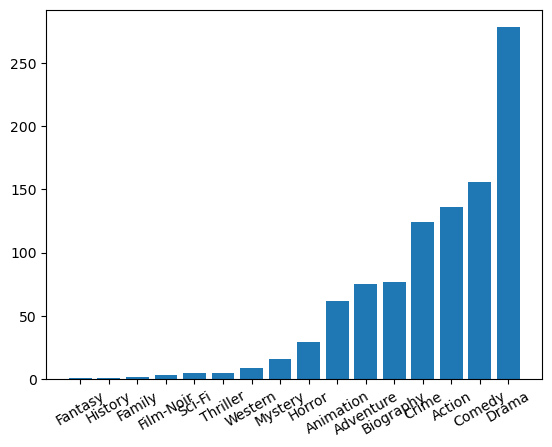

In [21]:
plt.bar(x=gener_data.index,height=gener_data.values)
a=plt.xticks(rotation=30)

In [22]:
gener_data

genre
Fantasy        1
History        1
Family         2
Film-Noir      3
Sci-Fi         5
Thriller       5
Western        9
Mystery       16
Horror        29
Animation     62
Adventure     75
Biography     77
Crime        124
Action       136
Comedy       156
Drama        278
Name: star_rating, dtype: int64

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


In [28]:
data.loc[(data.genre=='Crime') & (data.star_rating>9)]

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."


In [29]:
data.loc[(data.genre != 'Drama') & (data.genre != 'Comedy') & (data.genre != 'Action')]

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
...,...,...,...,...,...,...
966,7.4,The Simpsons Movie,PG-13,Animation,87,"[u'Dan Castellaneta', u'Julie Kavner', u'Nancy..."
969,7.4,Law Abiding Citizen,R,Crime,109,"[u'Gerard Butler', u'Jamie Foxx', u'Leslie Bibb']"
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [34]:
data.loc[~data.genre.isin(['Drama','Comedy','Action'])]
#isin函数代替in

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
...,...,...,...,...,...,...
966,7.4,The Simpsons Movie,PG-13,Animation,87,"[u'Dan Castellaneta', u'Julie Kavner', u'Nancy..."
969,7.4,Law Abiding Citizen,R,Crime,109,"[u'Gerard Butler', u'Jamie Foxx', u'Leslie Bibb']"
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [36]:
a='abf'
a=a.upper()
a

'ABF'

In [38]:
#applymap适用于每一个单元格
#map，apply适用于行或者列
data['title'].apply(lambda x:x.upper())

0                             THE SHAWSHANK REDEMPTION
1                                        THE GODFATHER
2                               THE GODFATHER: PART II
3                                      THE DARK KNIGHT
4                                         PULP FICTION
                            ...                       
974                                            TOOTSIE
975                        BACK TO THE FUTURE PART III
976    MASTER AND COMMANDER: THE FAR SIDE OF THE WORLD
977                                        POLTERGEIST
978                                        WALL STREET
Name: title, Length: 979, dtype: object

In [ ]:

# data['title'].str.upper()
#调用字符串属性

In [43]:
data['time']=pd.date_range(start='2023-1-1',periods=979)

In [44]:
data.head()

,star_rating,title,content_rating,genre,duration,actors_list,time
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",2023-01-01
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",2023-01-02
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",2023-01-03
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",2023-01-04
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",2023-01-05


In [ ]:
plt.figure(figsize=(10,10))
plt.plot()
plt.title()
plt.ylabel()
plt.xticks()
plt.legend()

In [47]:
data1=np.arange(start=1,stop=21).reshape((4,5))

In [48]:
data1

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20]])

In [55]:
data1[:,4:5]=data1[:,4:5]*100

In [56]:
data1

array([[   1,    2,    3,    4,  500],
       [   6,    7,    8,    9, 1000],
       [  11,   12,   13,   14, 1500],
       [  16,   17,   18,   19, 2000]])

In [58]:
data2=data1[0::2,0:4:2]
#起始位置，结束位置，步长

array([[ 1,  3],
       [11, 13]])